In [6]:
# from google.colab import drive
# drive.flush_and_unmount()

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# import sys

# curPath = '/content/drive/My Drive/Colab Notebooks'
# sys.path.append(curPath)

# os.chdir(curPath)
# os.listdir()

In [0]:
# !pip uninstall pyper
# !pip install pyper
# !pip3 install rpy2

In [7]:
# from pyper import *
# # r=R(RCMD="/usr/bin/R")
# r=R(RCMD="C:\\Program Files\\R\\R-4.0.0\\bin\\Rscript.exe")
# r.run("source('getAttributes.r')")
# # # R("source('extractfeatures_from_wav.R')")

In [3]:
# activate R magic
# %load_ext rpy2.ipython

# import rpy2.robjects as robjects
# r = robjects.r
# # r.source('extractfeatures_from_wav.R')
# r.source(os.path.join(os.getcwd(),'getAttributes.r'))

# import rpy2.robjects as robjects
# r = robjects.r

# r.source(os.path.join(os.getcwd(),'getAttributes.r'))
print(os.getcwd())
os.listdir()
rscript_path = os.path.join(os.getcwd(), 'getAttributes.r')
soundpath = os.path.join(os.getcwd(), 'sounds')
print(soundpath)
from subprocess import run
run(['C:/Program Files/R/R-4.0.0/bin/Rscript.exe', 'getAttributes.r', os.getcwd()])  # running R script for extracting data from recorded voice

<IPython.core.display.Javascript object>

C:\Users\prata\Google Drive\Colab Notebooks


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prata\Google Drive\Colab Notebooks\sounds


<IPython.core.display.Javascript object>

CompletedProcess(args=['C:/Program Files/R/R-4.0.0/bin/Rscript.exe', 'getAttributes.r', 'C:\\Users\\prata\\Google Drive\\Colab Notebooks'], returncode=0)

In [0]:
# !pip install pyaudio

In [0]:
import pyaudio
import wave
import os
import platform

def record_audio():
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    RECORD_SECONDS = 5
    WAVE_OUTPUT_FILENAME = "test_audio.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

record_audio()    

ModuleNotFoundError: ignored

In [0]:
record_audio()

if platform.system() == 'Linux':
    print('linux')
    os.system('"./praat/Praat" --run ./praat/extract_freq_info.praat')
elif platform.system() == 'Windows':
    print('windows')
    os.system('".\praat\Praat.exe" --run .\praat\extract_freq_info.praat')
    
file = open('output.txt','r')
values = file.readline()
values = values.split(', ')
for x in range(0,3):
    values[x] = float(values[x])/1000
    
print(values)

* recording
* done recording
C:\Users\prata\Google Drive\Colab Notebooks
windows
[0.12987966696157247, 0.10380061643439102, 0.14431090385082396]


In [0]:
# import rpy2.robjects as robjects
# r = robjects.r
# r.source('extractfeatures_from_wav.R')

print(os.getcwd())
os.listdir()
# from subprocess import run
# run(['Rscript', 'getAttributes.r', os.getcwd()])  # running R script for extracting data from recorded voice

C:\Users\prata\Google Drive\Colab Notebooks


['.ipynb_checkpoints',
 '1.png',
 '1test_audio.wav',
 'Advanced_ ML-PipeLine.ipynb',
 'Copy of Case-study - Apriori-AfterClass.ipynb',
 'Copy of Copy of Linear Regression_Edited (1).ipynb',
 'Copy of Copy of Linear Regression_Edited.ipynb',
 'Copy of Copy of Logistic Regression ( Titanic Dataset ).ipynb',
 'Copy of HousePricePredictionFinalProject.ipynb',
 'Copy of Storedata_apriori_assignment.ipynb',
 'extractfeatures_from_wav.R',
 'extract_freq_info.praat',
 'GenderRecognitionByVoiceAndSpeechAnalysis',
 'GenderRecognitionByVoiceAndSpeechAnalysis.ipynb',
 'getAttributes.r',
 'output.txt',
 'praat6114_linux64.tar',
 'praat6114_linux64.tar.gz',
 'praat6114_win64',
 'praat6114_win64.zip',
 'Recommendation_Engine_Part_I_Cosine_Similarity.ipynb',
 'test_audio.wav',
 'Untitled0.ipynb']

Read Data Set

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [76]:
dataPath = 'https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv'
dataset = pd.read_csv(dataPath)
dataset.head()

<IPython.core.display.Javascript object>

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [17]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [143]:
drop_features = ['dfrange','centroid','median','Q25','skew']
all_features = dataset.columns.to_list()
list(set(all_features) - set(drop_features))

['meanfun',
 'maxdom',
 'Q75',
 'maxfun',
 'meanfreq',
 'kurt',
 'IQR',
 'minfun',
 'sfm',
 'modindx',
 'mode',
 'meandom',
 'sd',
 'mindom',
 'label',
 'sp.ent']

In [42]:
print(np.array(testSet['meandom']).reshape(-1,1).shape)
print(np.array(trainSet['meandom']).reshape(-1,1).shape)
np.array(trainSet['label'].values).reshape(-1,1).shape
np.array(trainSet['meandom']).reshape(1,-1).shape

<IPython.core.display.Javascript object>

(634, 1)


<IPython.core.display.Javascript object>

(2534, 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1, 2534)

In [150]:
d = {}
d['name'] = {'c1':1, 'c2':2, 'c3':3}
d['name1'] = {'c1':4, 'c2':5, 'c3':6}
pd.DataFrame(d)

<IPython.core.display.Javascript object>

,name,name1
c1,1,4
c2,2,5
c3,3,6


In [51]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#Plot the variable importance
def plot_feature_importances(model, cols):
    n_features = trainX.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.title(type(model).__name__)
    plt.show()
    
    df = pd.DataFrame([model.feature_importances_, cols]).T
    df.columns = ['Importance', 'Feature']
    
def plot_confusion_matrix(X, labels, model):
    cm = confusion_matrix(labels, model.predict(X))
    cr = classification_report(labels, model.predict(X))
    print(cr)
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.show()
    
def plot_roc_curves(model, x, y):
    cv = StratifiedKFold(n_splits=5,shuffle=False)
#     tree = DecisionTreeClassifier(random_state=0)

    # plot arrows
    fig1 = plt.figure(figsize=[8,12])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    ax1.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5) )
    ax1.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5) )

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in cv.split(x,y):
        prediction = model.fit(x[train],y[train]).predict_proba(x[test])
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1


    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.grid()
    plt.show()

def plot_learning_curve(model, xtrain, ytrain):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                           X=xtrain,
                                                           y=ytrain,
                                                           train_sizes=np.linspace(0.1, 1.0, 10),
                                                           cv=10)

    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)

    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training accuracies 
    plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')

    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()  
    
def plot_validation_curve(model, xtrain, ytrain, parameter_name):
    param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    train_scores, test_scores = validation_curve(estimator=model,
                                                 X=xtrain,
                                                 y=ytrain,
                                                 param_name=parameter_name,
                                                 param_range=param_range,
                                                 cv=10)

    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)

    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training accuracies 
    plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(param_range,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(param_range,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')

    plt.xscale('log')
    plt.xlabel('Regularization parameter C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()     

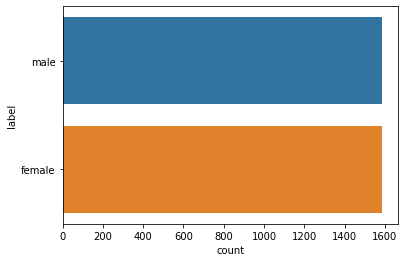

In [77]:
import seaborn as sns
_ = sns.countplot(y='label', data=dataset, )

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train shape (2534, 1) (2534,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test shape (634, 1) (634,)
LogisticRegression

Accuracy on training set: 0.568
Accuracy on test set: 0.573
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       333
           1       0.55      0.54      0.55       301

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.57      0.57      0.57       634



<IPython.core.display.Javascript object>

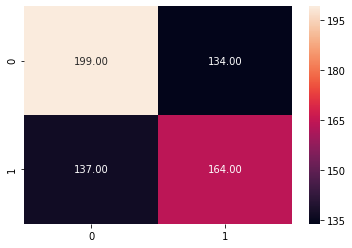

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

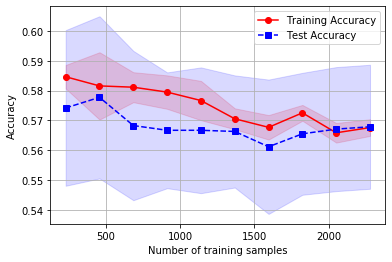

In [82]:
from sklearn.model_selection import train_test_split

dataset.loc[:,'label'][dataset['label']=="male"] = 0
dataset.loc[:,'label'][dataset['label']=="female"] = 1
dataset.label = dataset.label.astype(int)

trainX, testX, train_labels, test_labels = train_test_split(dataset['meandom'], dataset['label'], 
                                                            random_state=0, test_size=.2)
trainX = np.array(trainX).reshape(-1,1)
testX = np.array(testX).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)

trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
train_labels = list(trainSet['label'].values)
test_labels = list(testSet['label'].values)

print('Train shape', np.array(trainX).shape, np.array(train_labels).shape)
print('Test shape', np.array(testX).shape, np.array(test_labels).shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
logreg = LogisticRegression()

logreg = logreg.fit(trainX, train_labels)
print("LogisticRegression\n")
print("Accuracy on training set: {:.3f}".format(logreg.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(logreg.score(testX, test_labels)))

# logreg.predict_proba(testX)
plot_confusion_matrix(testX, test_labels, logreg)
# plot_roc_curves(logreg, trainX.astype(int), train_labels) 
plot_learning_curve(logreg, trainX, train_labels)

In [ ]:
def create_seaborn_heatmap_highcorelated(df,posThreshold,negThreshold):
  '''
      create Heatmap for highly co-related(given threshold) columns

      Input: dataframe, positive threshold, negitive threshold
      Plot: Heatmap
  '''
  df_corr = df.corr()
  tempdf = df_corr[(df_corr > posThreshold) | (df_corr < -negThreshold)]
  tempdf.replace(to_replace=1,value=np.nan,inplace=True)
  tempdf.dropna(axis=1,how='all',inplace=True)
  tempdf.dropna(axis=0,how='all',inplace=True)
  sns.heatmap(tempdf,annot=True, cmap="Blues")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train shape (2534, 20) (2534,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test shape (634, 20) (634,)
Full LogisticRegression

Accuracy on training set: 0.975
Accuracy on test set: 0.973
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       333
           1       0.98      0.96      0.97       301

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



<IPython.core.display.Javascript object>

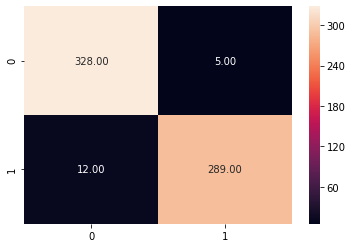

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

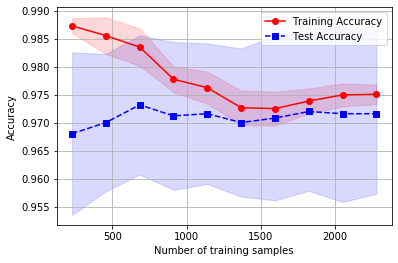

In [85]:
from sklearn.model_selection import train_test_split

dataset.loc[:,'label'][dataset['label']=="male"] = 0
dataset.loc[:,'label'][dataset['label']=="female"] = 1
dataset.label = dataset.label.astype(int)

features = dataset.columns.drop('label')
trainX, testX, train_labels, test_labels = train_test_split(dataset[features], dataset['label'], 
                                                            random_state=0, test_size=.2)
# trainX = np.array(trainX).reshape(-1,1)
# testX = np.array(testX).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)

trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
train_labels = list(trainSet['label'].values)
test_labels = list(testSet['label'].values)

print('Train shape', np.array(trainX).shape, np.array(train_labels).shape)
print('Test shape', np.array(testX).shape, np.array(test_labels).shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
logreg = LogisticRegression()

logreg = logreg.fit(trainX, train_labels)
print("Full LogisticRegression\n")
print("Accuracy on training set: {:.3f}".format(logreg.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(logreg.score(testX, test_labels)))

# logreg.predict_proba(testX)
plot_confusion_matrix(testX, test_labels, logreg)
# plot_roc_curves(logreg, trainX.astype(int), train_labels) 
plot_learning_curve(logreg, trainX, train_labels)

In [110]:
for f in list(zip((features.to_list(), list(logreg.coef_)))):
    print(f)
# print()    
# print(list(zip(features, logreg.coef_)))
# print(list(zip(features.values, logreg.coef_)))
type(list(logreg.coef_))
type(features.values)

(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],)
([array([-0.23381288, -0.42710172,  0.22607774,  0.88409833, -0.45623306,
       -1.24128503, -0.05071315,  0.58322451, -1.05658797,  1.34652226,
       -0.13646546, -0.23381288,  4.78747352, -0.5422556 ,  0.06972313,
        0.01797079,  0.10989081,  0.02279279,  0.02085328,  0.3132874 ])],)


numpy.ndarray

In [120]:
logreg.coef_[0, :]

array([-0.23381288, -0.42710172,  0.22607774,  0.88409833, -0.45623306,
       -1.24128503, -0.05071315,  0.58322451, -1.05658797,  1.34652226,
       -0.13646546, -0.23381288,  4.78747352, -0.5422556 ,  0.06972313,
        0.01797079,  0.10989081,  0.02279279,  0.02085328,  0.3132874 ])

In [141]:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],features):
    coef_dict[feat] = round(coef,3)
#     print(feat, np.round_coef)

print(coef_dict)
n=3
pd.DataFrame(coef_dict, index=[0]).T[(n*5):(n*5+5)]

{'meanfreq': -0.234, 'sd': -0.427, 'median': 0.226, 'Q25': 0.884, 'Q75': -0.456, 'IQR': -1.241, 'skew': -0.051, 'kurt': 0.583, 'sp.ent': -1.057, 'sfm': 1.347, 'mode': -0.136, 'centroid': -0.234, 'meanfun': 4.787, 'minfun': -0.542, 'maxfun': 0.07, 'meandom': 0.018, 'mindom': 0.11, 'maxdom': 0.023, 'dfrange': 0.021, 'modindx': 0.313}


<IPython.core.display.Javascript object>

,0
meandom,0.018
mindom,0.110
maxdom,0.023
dfrange,0.021
modindx,0.313


In [0]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


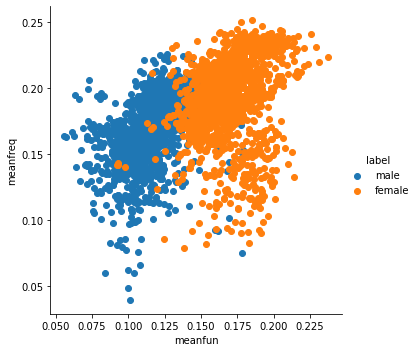

In [0]:
# plt.subplot()
sns.FacetGrid(dataset, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

male 1584
female 1584


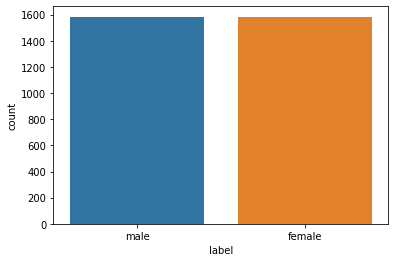

In [0]:
print('male', len(dataset[dataset.label == 'male']))
print('female', len(dataset[dataset.label == 'female']))
_ = sns.countplot(x='label', data=dataset)

In [0]:
# fig, ax = plt.subplots(4, 5, figsize=(18,8))
# axes = ax.ravel()
# for i, col in enumerate(dataset.columns.drop('label')):
#     # print(i, col)
#     _ = sns.scatterplot(data=dataset, x='meanfun', y=col, hue='label', ax=axes[i])

In [0]:
# sns.pairplot(data=dataset, hue='label')

In [0]:
dataset[dataset.label == 'male']

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.155565,0.059072,0.127465,0.110698,0.214884,0.104186,3.447731,19.470467,0.912684,0.454094,0.111186,0.155565,0.121602,0.040816,0.263158,0.451050,0.004883,0.795898,0.791016,0.437586,male
1580,0.164135,0.060230,0.171909,0.108091,0.219123,0.111032,2.954296,14.333682,0.901312,0.385642,0.106708,0.164135,0.104192,0.013369,0.222222,0.429145,0.004883,0.795898,0.791016,0.554321,male
1581,0.170778,0.063865,0.171791,0.114757,0.232615,0.117858,2.360729,10.014721,0.914712,0.425689,0.116825,0.170778,0.115603,0.044053,0.256410,0.467187,0.078125,0.795898,0.717773,0.602527,male
1582,0.162350,0.060335,0.140085,0.112611,0.224204,0.111593,3.506742,20.298964,0.907180,0.412580,0.114815,0.162350,0.110352,0.019231,0.270270,0.420532,0.087891,0.771484,0.683594,0.600000,male


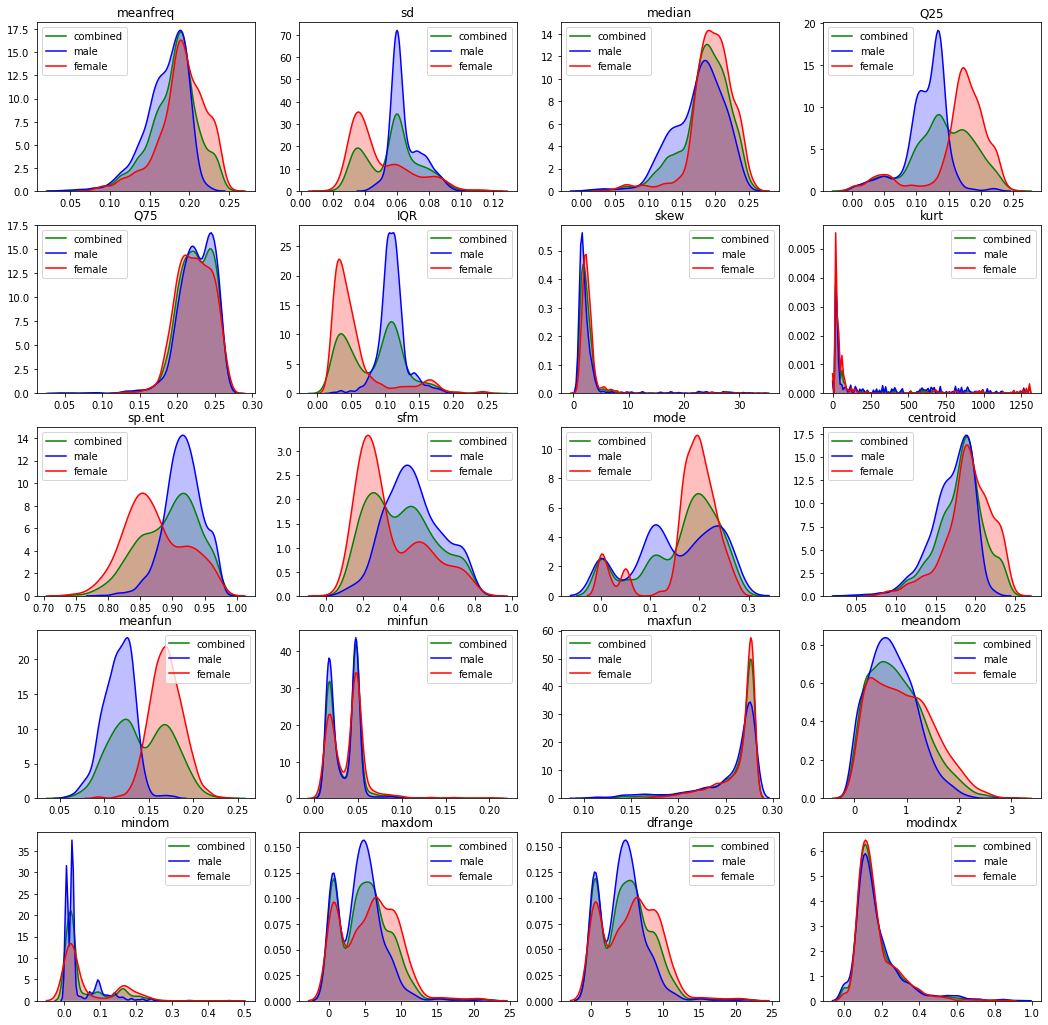

In [0]:
# plt.areaplot(data=dataset, x="meanfun", y="meanfreq")
# plt.plot(kind='area', dataset.meanfun, y=dataset.meanfreq)

fig, ax = plt.subplots(5, 4, figsize=(18,18))
axes = ax.ravel()
for i, col in enumerate(dataset.columns.drop('label')):
    sns.kdeplot(data=dataset[col], color='g', shade=True, Label='combined', ax=axes[i])
    sns.kdeplot(data=dataset[dataset.label == 'male'][col], color='b', shade=True, Label='male', ax=axes[i])
    sns.kdeplot(data=dataset[dataset.label == 'female'][col], color='r', shade=True, Label='female', ax=axes[i])
    axes[i].set_title(col)

In [0]:
# fig, ax = plt.subplots(5, 4, figsize=(18,12))
# axes = ax.ravel()
# for i, col in enumerate(dataset.columns.drop('label')):
#     _ = axes[i].hist(col, data=dataset[dataset.label=='female'], bins=20, color='red', alpha=.5, )
#     _ = axes[i].hist(col, data=dataset[dataset.label=='male'], bins=20, color='lightgreen')
#     axes[i].set_title(col) #list(dataset.columns)[i])
#     axes[i].set_yticks(())

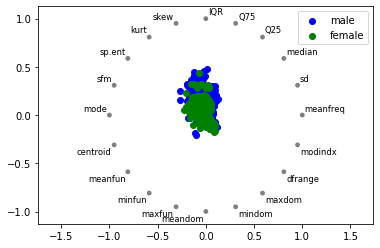

In [0]:
#Good to compare every feature
from pandas.plotting import radviz
radviz(dataset, "label", color=['blue', 'green'])

Text(0, 0.5, 'Amplitude')

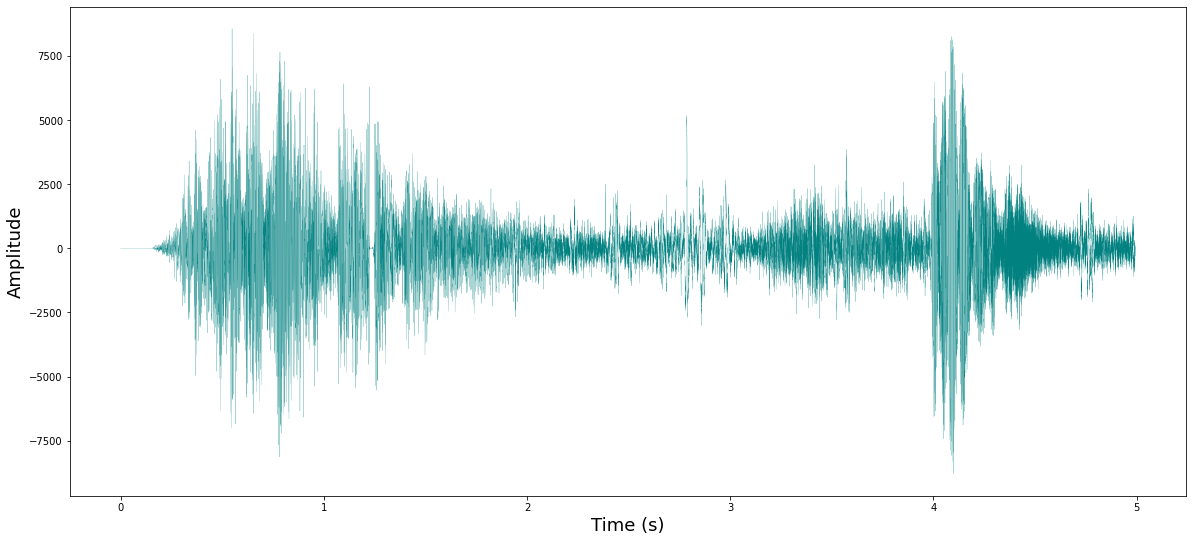

In [0]:
from scipy.io import wavfile
wav_file = 'praat/1test_audio.wav'
rate, data = wavfile.read(wav_file)

time = np.arange(0, float(data.shape[0]), 1) / rate
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
# Label encode "Male = 0, Female = 1"
dataset.loc[:,'label'][dataset['label']=="male"] = 0
dataset.loc[:,'label'][dataset['label']=="female"] = 1

In [0]:
# Split data in 80-20 proportion and scale the data
trainSet, testSet = train_test_split(dataset, random_state=0, test_size=.2)
scaler = StandardScaler()
scaler.fit(trainSet.iloc[:,0:20])

trainX = scaler.transform(trainSet.iloc[:,0:20])
testX = scaler.transform(testSet.iloc[:,0:20])
train_labels = list(trainSet['label'].values)
test_labels = list(testSet['label'].values)

In [0]:
#Plot the variable importance
def plot_feature_importances(model, cols):
    n_features = trainX.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    df = pd.DataFrame([model.feature_importances_, cols]).T
    df.columns = ['Importance', 'Feature']
    # print(df)


In [0]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=0).fit(trainX, train_labels)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(tree.score(testX, test_labels)))

Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.961


In [0]:
def plot_confusion_matrix(X, labels, model):
    cm = confusion_matrix(labels, model.predict(X))
    cr = classification_report(labels, model.predict(X))
    print(cr)
    return sns.heatmap(cm, annot=True, fmt='.2f')

# cm = confusion_matrix(test_labels, tree.predict(testX))
# cr = classification_report(test_labels, tree.predict(testX))
# print(cr)
# sns.heatmap(cm, annot=True, fmt='.2f') # xticklabels=['a','b'],

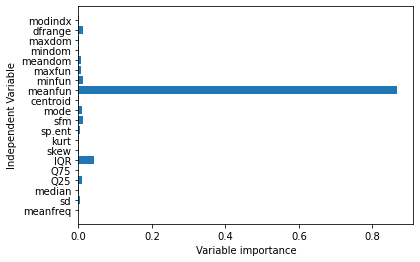

In [0]:
plot_feature_importances(tree, list(dataset.columns.drop('label')))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       333
           1       0.96      0.96      0.96       301

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



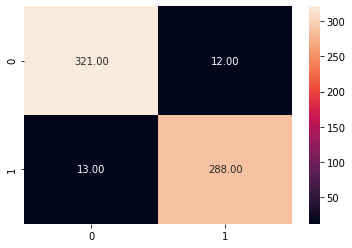

In [0]:
plot_confusion_matrix(testX, test_labels, tree)

In [0]:
# Random forest
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(trainX, train_labels)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(forest.score(testX, test_labels)))

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.976


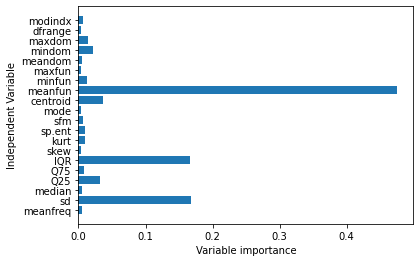

In [0]:
plot_feature_importances(forest, list(dataset.columns.drop('label')))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.97      0.98      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



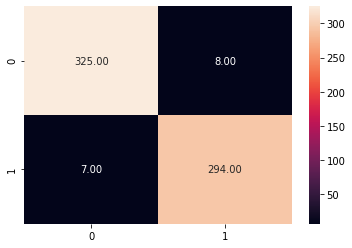

In [0]:
plot_confusion_matrix(testX, test_labels, forest)

In [0]:
# Gradient boost
grboost = GradientBoostingClassifier(random_state=0).fit(trainX, train_labels)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(grboost.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(grboost.score(testX, test_labels)))
# grboost.estimators_[0]

Gradient Boosting
Accuracy on training set: 0.996
Accuracy on test set: 0.975


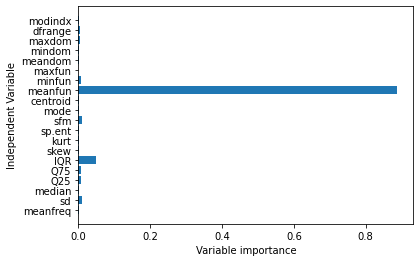

In [0]:
plot_feature_importances(grboost, list(dataset.columns.drop('label')))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.98      0.96      0.97       301

    accuracy                           0.97       634
   macro avg       0.98      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



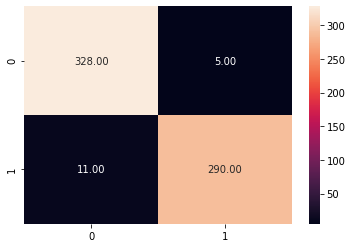

In [0]:
plot_confusion_matrix(testX, test_labels, grboost)

In [0]:
# Support vector machine
svm = SVC().fit(trainX, train_labels)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(svm.score(testX, test_labels)))

Support Vector Machine
Accuracy on training set: 0.985
Accuracy on test set: 0.984


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.98      0.99      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



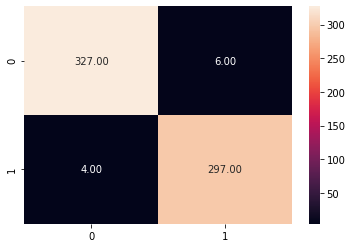

In [0]:
plot_confusion_matrix(testX, test_labels, svm)

In [0]:
# Neural network model
mlp = MLPClassifier(random_state=0).fit(trainX, train_labels)
print("Multilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(mlp.score(testX, test_labels)))

Multilayer Perceptron
Accuracy on training set: 0.996
Accuracy on test set: 0.983


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.98      0.99      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



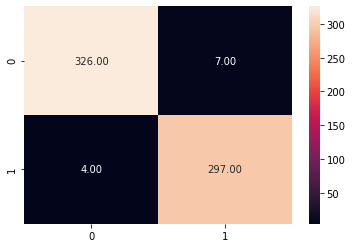

In [0]:
plot_confusion_matrix(testX, test_labels, mlp)

In [0]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 2)
# trainX_LDA = lda.fit_transform(trainX, train_labels)
# testX_LDA = lda.transform(testX)

# print(lda.classes_)
# print(lda.explained_variance_ratio_)
# print('trainX',trainX.shape)
# print('testX',testX.shape)
# print('trainX_LDA',trainX_LDA.shape)
# print('testX_LDA',testX_LDA.shape)
# print(len(train_labels), len(test_labels))

# svm = SVC().fit(trainX_LDA, train_labels)
# print("Support Vector Machine")
# print("Accuracy on training set: {:.3f}".format(svm.score(trainX_LDA, train_labels)))
# print("Accuracy on test set: {:.3f}".format(svm.score(testX_LDA, test_labels)))

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# trainX_PCA = pca.fit_transform(trainX, train_labels)
# testX_PCA = pca.transform(testX)

# # print(pca.classes_)
# print(pca.explained_variance_ratio_)
# print('trainX',trainX.shape)
# print('testX',testX.shape)
# print('trainX_PCA',trainX_PCA.shape)
# print('testX_PCA',testX_PCA.shape)
# print(len(train_labels), len(test_labels))

# svm = SVC().fit(trainX_PCA, train_labels)
# print("Support Vector Machine")
# print("Accuracy on training set: {:.3f}".format(svm.score(trainX_PCA, train_labels)))
# print("Accuracy on test set: {:.3f}".format(svm.score(testX_PCA, test_labels)))

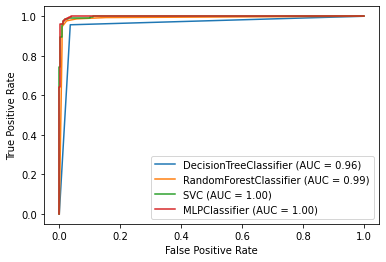

In [0]:
from sklearn.metrics import plot_roc_curve
# plot_confusion_matrix()

disp = plot_roc_curve(tree, testX, test_labels)
plot_roc_curve(forest, testX, test_labels, ax=disp.ax_);
plot_roc_curve(svm, testX, test_labels, ax=disp.ax_);
plot_roc_curve(mlp, testX, test_labels, ax=disp.ax_);

[[-52.74389     6.146706 ]
 [ 25.632456  -11.1637335]
 [  3.7758234  53.606186 ]
 ...
 [ 51.717037   25.386356 ]
 [-66.71452     5.1824093]
 [-34.571896    5.0395684]]


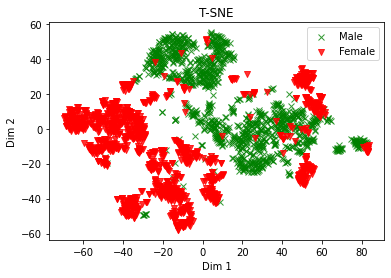

In [0]:
# TSNE Representation that already splits female from male
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(trainX, train_labels)

print(X_t)

male_indexes=[]
female_indexes=[]
for i in range(len(train_labels)):
    if train_labels[i] == 0:
        male_indexes.append(True)
    else:
        male_indexes.append(False)

for i in range(len(train_labels)):
    if train_labels[i] == 1:
        female_indexes.append(True)
    else:
        female_indexes.append(False)

plt.figure()
plt.scatter(X_t[male_indexes, 0],
                   X_t[male_indexes, 1], #np.where(train_labels == 0)
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[female_indexes, 0],
                   X_t[female_indexes, 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show() 

In [0]:


len(X_t[male_indexes])

1251